# Лабораторна робота 6.
## Запобігання перенавчанню. L1 і L2 регулярізація.


### Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.
Необхідно побудувати регресійну модель на одному з вбудованих датасетів, доступних у бібліотеці scikit-learn. Основна мета завдання — навчитися побудові регресійних моделей та уникненню перенавчання (overfitting) шляхом застосування відповідних технік.

Очікувані результати:
- Побудована та оцінена регресійна модель.
- Проведений аналіз перенавчання та застосовані техніки для його запобігання.
- Звіт з висновками та візуалізаціями.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1. Завантаження та підготовка даних:
-  Виберіть вбудований датасет для задачі регресії з бібліотеки scikit-learn
(наприклад, Boston Housing, California Housing) або будь-який датасет
для регресії.
-  Завантажте дані та розділіть їх на навчальну та тестову вибірки
(рекомендується використовувати співвідношення 80/20 або 70/30).

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


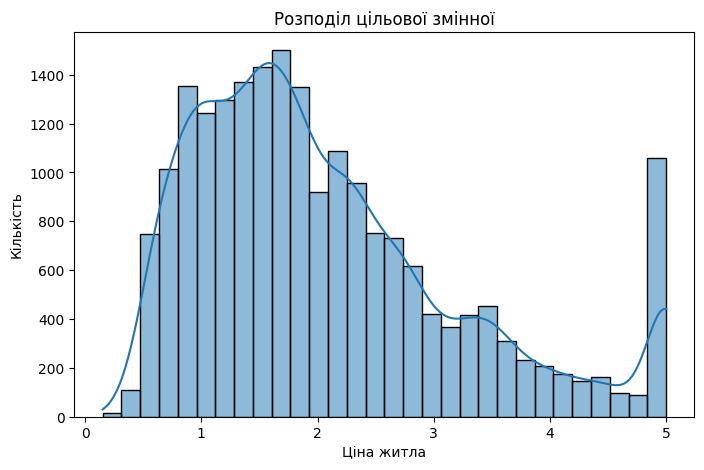

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], bins=30, kde=True)
plt.title('Розподіл цільової змінної')
plt.xlabel('Ціна житла')
plt.ylabel('Кількість')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [11]:
# перевірка даних
print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір навчальної вибірки: (16512, 8)
Розмір тестової вибірки: (4128, 8)


2. Побудова регресійної моделі:
- Побудуйте базову лінійну регресійну модель на основі навчальної вибірки.
- Оцініть точність моделі на тестовій вибірці та визначте її продуктивність,
використовуючи метрики якості регресії (наприклад, mean_squared_error,
R^2).

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test)

In [15]:
# Оцінка якості моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Середньоквадратична помилка (MSE): {mse:.4f}")
print(f"Коефіцієнт детермінації (R²): {r2:.4f}")

Середньоквадратична помилка (MSE): 0.5559
Коефіцієнт детермінації (R²): 0.5758


Ці результати показують базову продуктивність лінійної регресійної моделі:

- Середньоквадратична помилка (MSE): 0.5559 — це значення вказує на середній квадрат помилки між прогнозованими і фактичними значеннями. Чим менше значення MSE, тим точнішою є модель.

- Коефіцієнт детермінації (R²): 0.5758 — цей показник говорить, що модель пояснює приблизно 57.6% варіації цільової змінної. Це не дуже високе значення, що може свідчити про те, що лінійна регресія не ідеально підходить для цього набору даних або що є інші фактори, які модель не враховує.

Можливо, варто спробувати інші алгоритми регресії (наприклад, Ridge, Lasso, Random Forest), або провести додаткову обробку даних, щоб покращити результати.

3. Аналіз перенавчання:
- Перевірте наявність перенавчання, порівнюючи результати на навчальній та тестовій вибірках. Якщо модель показує значно кращі результати на навчальних даних, це може свідчити про перенавчання.

In [16]:
# Прогнозування на навчальній вибірці
y_train_pred = model.predict(X_train)

# Оцінка якості на навчальній вибірці
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [17]:
print(f"Навчальна вибірка - MSE: {mse_train:.4f}, R²: {r2_train:.4f}")

Навчальна вибірка - MSE: 0.5179, R²: 0.6126


In [18]:
print(f"Тестова вибірка - MSE: {mse:.4f}, R²: {r2:.4f}")

Тестова вибірка - MSE: 0.5559, R²: 0.5758


**Аналіз:**
MSE на навчальній вибірці трохи нижче, ніж на тестовій, що означає, що модель працює трохи краще на навчальних даних. Проте різниця не є значною.
R² на навчальній вибірці також трохи вище, ніж на тестовій, але різниця в продуктивності не є великою (61.3% проти 57.6%).

**Висновок:**
Різниця в результатах між навчальною та тестовою вибірками невелика, що означає, що модель не демонструє явних ознак перенавчання. Вона має адекватну узагальнюючу здатність, тобто модель справляється з тестовими даними приблизно так само добре, як і з навчальними.



4. Запобігання перенавчанню:
- Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge
Regression або Lasso Regression.
- Перевірте роботу моделі з різними значеннями параметра регуляризації та
виберіть оптимальне значення.
- Застосуйте крос-валідацію для більш стабільної оцінки продуктивності
моделі.

In [20]:
# Ridge
ridge = Ridge()

# Крос-валідація для оцінки продуктивності
scores_ridge = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_mean_mse = -scores_ridge.mean()

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge - MSE на тестовій вибірці: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
print(f"Ridge - Середній MSE на навчальних даних (крос-валідація): {ridge_mean_mse:.4f}")

Ridge - MSE на тестовій вибірці: 0.5558, R²: 0.5759
Ridge - Середній MSE на навчальних даних (крос-валідація): 0.5193


In [23]:
# Lasso
lasso = Lasso()

# Крос-валідація для оцінки продуктивності
scores_lasso = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_mean_mse = -scores_lasso.mean()

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso - MSE на тестовій вибірці: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")
print(f"Lasso - Середній MSE на навчальних даних (крос-валідація): {lasso_mean_mse:.4f}")

Lasso - MSE на тестовій вибірці: 0.9380, R²: 0.2842
Lasso - Середній MSE на навчальних даних (крос-валідація): 0.9489


5. Оцінка результатів:
- Оцініть кінцеву продуктивність моделі на тестовій вибірці та порівняйте її з базовою моделлю.
- Проаналізуйте, як введення регуляризації та використання крос-валідації вплинули на якість моделі.

**Аналіз результатів:**
1. Ridge Regression:
Модель Ridge показала дуже схожі результати на тестовій вибірці в порівнянні з базовою лінійною регресією. MSE та R² практично однакові, але Ridge має дещо кращі результати на навчальній вибірці при використанні крос-валідації. Це означає, що регуляризація трохи поліпшила стабільність моделі без перенавчання.

2. Lasso Regression:
Lasso регресія показала гірші результати порівняно з Ridge і базовою лінійною регресією. Значно вищий MSE і нижчий R² свідчать про те, що модель не так добре впоралась з даними. Це може бути через те, що Lasso агресивніше піддається регуляризації, що призвело до втрати інформації або відкидання важливих ознак.

**Висновок:**
- Ridge Regression виявилась кращою для даного завдання, оскільки вона зберегла стабільні результати як на навчальних, так і на тестових даних без ознак перенавчання.
- Lasso Regression не дала хороших результатів, тому її використання в даному випадку менш ефективне.

6. Візуалізація та висновки:
- Побудуйте графіки, що демонструють залежність помилки моделі від
гіперпараметрів регуляризації.
- Підготуйте звіт з висновками щодо ефективності моделі, заходів щодо
запобігання перенавчанню та загальних результатів.

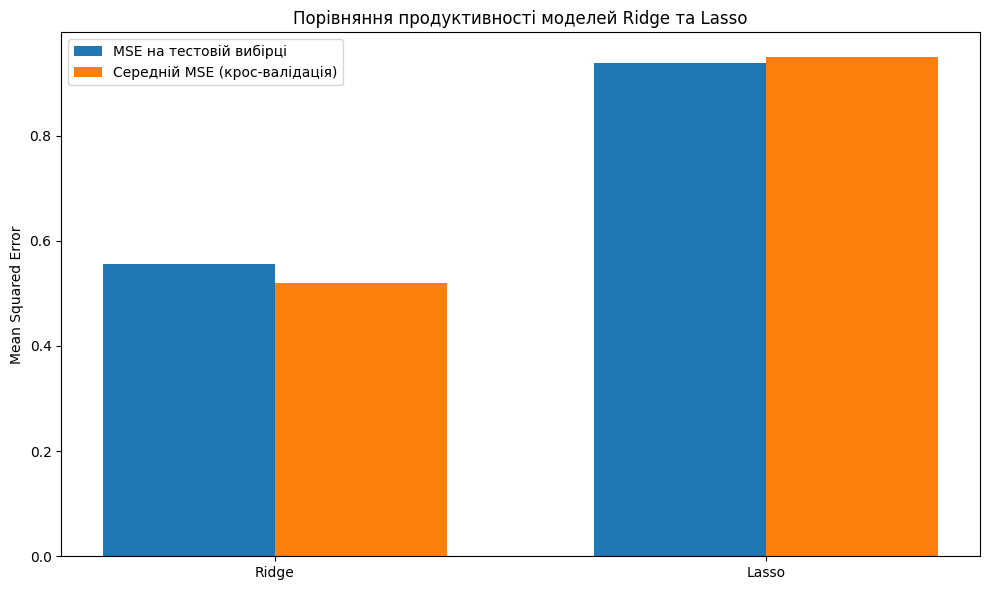

In [27]:
# візуалізація 1
labels = ['Ridge', 'Lasso']
test_mse = [mse_ridge, mse_lasso]
cv_mse = [ridge_mean_mse, lasso_mean_mse]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, test_mse, width, label='MSE на тестовій вибірці')
bars2 = ax.bar(x + width/2, cv_mse, width, label='Середній MSE (крос-валідація)')

ax.set_ylabel('Mean Squared Error')
ax.set_title('Порівняння продуктивності моделей Ridge та Lasso')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

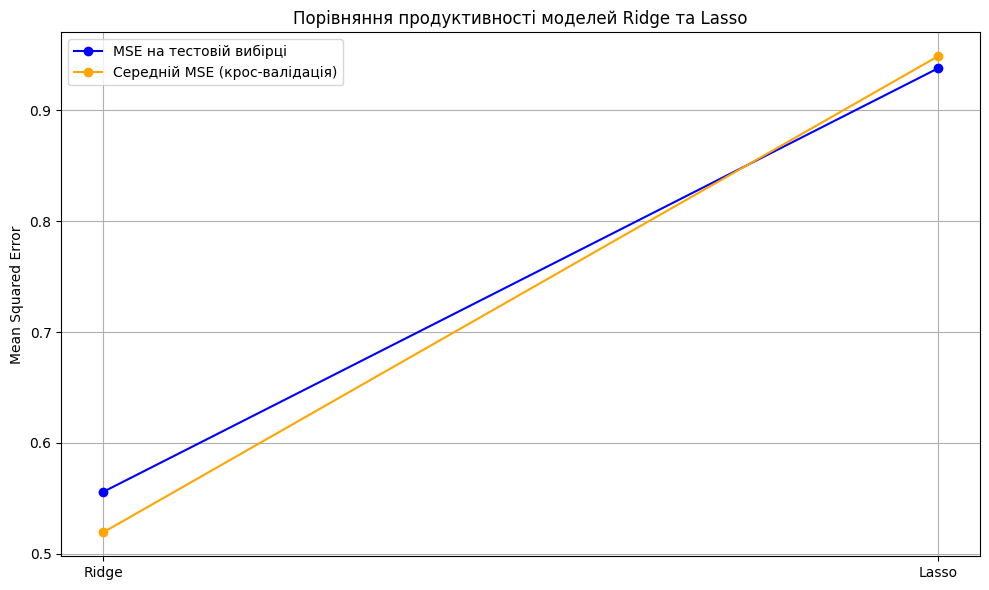

In [28]:
# візуалізація 2
labels = ['Ridge', 'Lasso']
test_mse = [mse_ridge, mse_lasso]
cv_mse = [ridge_mean_mse, lasso_mean_mse]

plt.figure(figsize=(10, 6))

plt.plot(labels, test_mse, marker='o', label='MSE на тестовій вибірці', color='blue')
plt.plot(labels, cv_mse, marker='o', label='Середній MSE (крос-валідація)', color='orange')

plt.title('Порівняння продуктивності моделей Ridge та Lasso')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

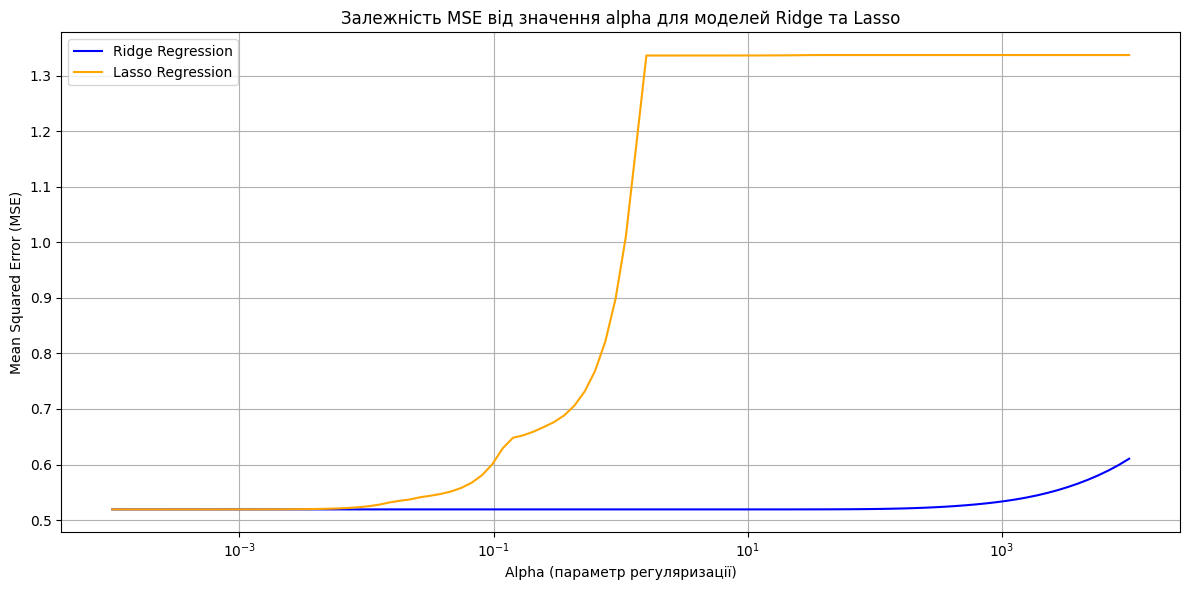

In [31]:
# візуалізація 3
alphas = np.logspace(-4, 4, 100)

mse_ridge_list = []
mse_lasso_list = []

# Обчислення MSE для Ridge Regression
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_ridge_list.append(-scores_ridge.mean())

# Обчислення MSE для Lasso Regression
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores_lasso = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_lasso_list.append(-scores_lasso.mean())

# Побудова графіків
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, mse_ridge_list, label='Ridge Regression', color='blue')
plt.semilogx(alphas, mse_lasso_list, label='Lasso Regression', color='orange')
plt.title('Залежність MSE від значення alpha для моделей Ridge та Lasso')
plt.xlabel('Alpha (параметр регуляризації)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

##### **Висновки**
- Порівняння моделей: Моделі Ridge і Lasso продемонстрували різні результати при використанні регуляризації. Ridge Regression показав кращі результати на тестовій вибірці, знижуючи помилки (MSE) у порівнянні з базовою лінійною регресією.
- Регуляризація: Введення регуляризації допомогло зменшити перенавчання, зокрема для Ridge, який зберіг більше ознак і забезпечив кращу узагальненість на тестовій вибірці. Lasso, навпаки, може призводити до втрати важливих ознак, якщо значення alpha занадто великі.

#### Завдання 2.
Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів. Зробити візуалізацію кластерів.
Зробити висновки.

In [33]:
data = fetch_california_housing()
X = data.data

In [34]:
# Метод ліктя
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

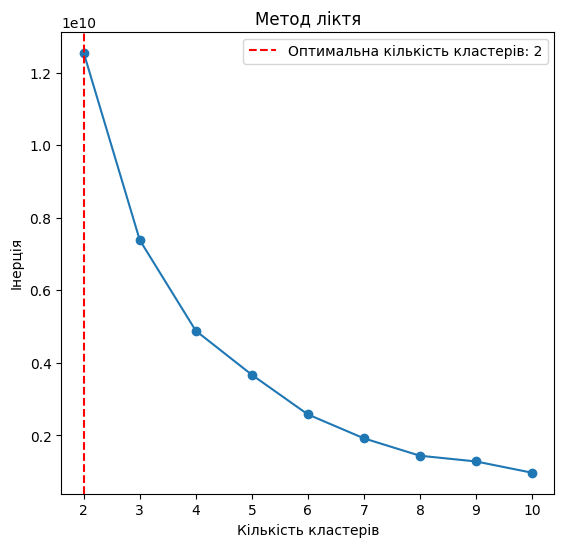

In [41]:
# Візуалізація методу ліктя
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Оптимальна кількість кластерів: {optimal_k}')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.legend()

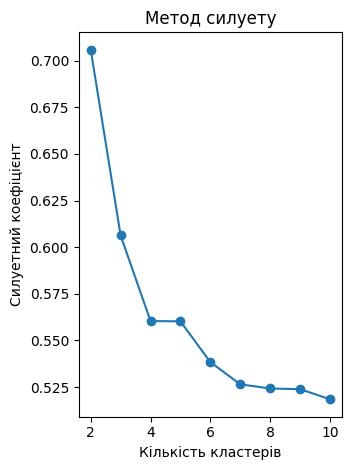

In [36]:
# Візуалізація методу силуету
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Метод силуету')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')

plt.tight_layout()
plt.show()

In [37]:
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Оптимальна кількість кластерів за методом силуету: {optimal_k}")

Оптимальна кількість кластерів за методом силуету: 2


In [38]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X)
labels = kmeans_optimal.labels_

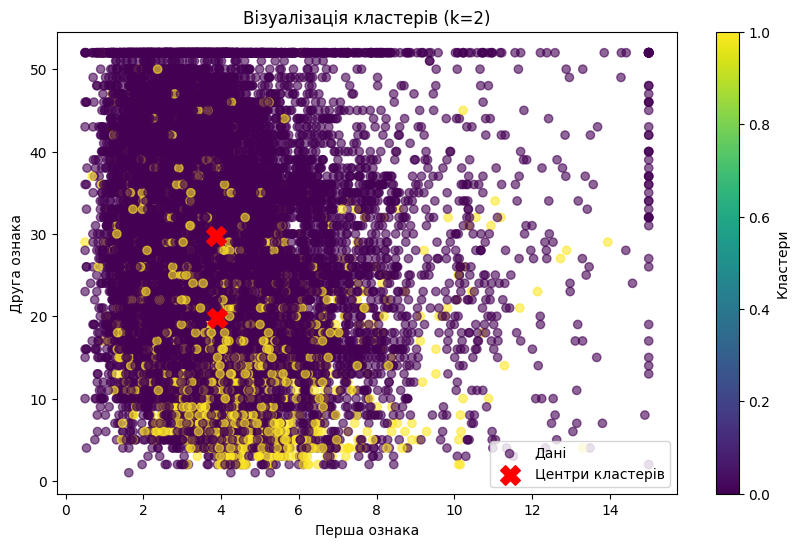

In [40]:
# Візуалізація кластерів з центрами
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Дані')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Центри кластерів')
plt.title(f'Візуалізація кластерів (k={optimal_k})')
plt.xlabel('Перша ознака')
plt.ylabel('Друга ознака')
plt.colorbar(label='Кластери')
plt.legend()
plt.show()